## Data Analysis_1

* 1) Perform general Data analysis
* 2) Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot
* 3) Create a plot based on the Variation of the price range by the vehicle type
* 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client
* 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)


**1) Perform general Data analysis**

### Importing the Libraries

In [49]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt


### Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\sathi\Downloads\autos.csv",encoding='ISO-8859-1')

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


### Description About Features

    dateCrawled: Date and time when the car listing was first crawled.
    name: Name of the car.
    seller: Indicates whether the seller is private or commercial.
    offerType: Indicates whether the listing is an offer or a request.
    price: Price of the car.
    abtest: A/B test category.
    vehicleType: Type of vehicle (e.g., coupe, SUV, etc.).
    yearOfRegistration: Year the car was first registered.
    gearbox: Type of gearbox (manual, automatic, etc.).
    powerPS: Power of the car in PS.
    model: Model of the car.
    kilometer: The distance the car has been driven in kilometers.
    monthOfRegistration: Month the car was registered.
    fuelType: Type of fuel the car uses.
    brand: Brand of the car.
    notRepairedDamage: Indicates if the car has damage that is not yet repaired.
    dateCreated: Date when the car listing was created.
    nrOfPictures: Number of pictures in the ad.
    postalCode: Postal code location of the vehicle.
    lastSeen: Date and time the crawler saw this ad last online.

### Data Cleaning 

    1.Structural Errors
    2.Missing Values Detection
    3.Outlier Detection
    4.DataType Conversion
    5.Duplicate Detection

In [11]:
d = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'Null Perce':df.isna().sum() / len(df),
    'DataTypes':df.dtypes.values
})
d

,Unique,Null,Null Perce,DataTypes
dateCrawled,280500,0,0.000000,object
name,233531,0,0.000000,object
seller,2,0,0.000000,object
offerType,2,0,0.000000,object
price,5597,0,0.000000,int64
abtest,2,0,0.000000,object
vehicleType,8,37869,0.101928,object
yearOfRegistration,155,0,0.000000,int64
gearbox,2,20209,0.054394,object
powerPS,794,0,0.000000,int64


### Checking the Structural Errors

In [13]:
for i in df.columns:
    print(i,'\n',df[i].unique())

dateCrawled 
 ['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-14 17:48:27' '2016-03-19 18:57:12' '2016-03-07 19:39:19']
name 
 ['Golf_3_1.6' 'A5_Sportback_2.7_Tdi' 'Jeep_Grand_Cherokee_"Overland"' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']
seller 
 ['privat' 'gewerblich']
offerType 
 ['Angebot' 'Gesuch']
price 
 [  480 18300  9800 ... 18429 24895 10985]
abtest 
 ['test' 'control']
vehicleType 
 [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
yearOfRegistration 
 [1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1111
 1969 1971 1987 1986 1988 1967 1970 1965 1945 1925 1974 1979 1955 1978
 1972 1977 1961 1963 1964 1960 1966 1975 1937 1936 5000 1954 1958 9999
 1956 3200 1000 1933 1941 1962 8888 150

fuelType 
 ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
brand 
 ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
notRepairedDamage 
 [nan 'ja' 'nein']
dateCreated 
 ['2016-03-24 00:00:00' '2016-03-14 00:00:00' '2016-03-17 00:00:00'
 '2016-03-31 00:00:00' '2016-04-04 00:00:00' '2016-04-01 00:00:00'
 '2016-03-21 00:00:00' '2016-03-26 00:00:00' '2016-04-07 00:00:00'
 '2016-03-15 00:00:00' '2016-03-11 00:00:00' '2016-03-20 00:00:00'
 '2016-03-23 00:00:00' '2016-03-27 00:00:00' '2016-03-12 00:00:00'
 '2016-03-13 00:00:00' '2016-03-18 00:00:00' '2016-03-10 00:00:00'
 '2016-03-07 00:00:00' '2016-03-09 00:00:00' '2016-03-08 00:00:00'
 '2016-04-03 00:

In [14]:
def month(n):
    if n==1:
        return 'January'
    elif n==2:
        return 'February'
    elif n==3:
        return 'March'
    elif n==4:
        return 'April'
    elif n==5:
        return 'May'
    elif n==6:
        return 'June'
    elif n==7:
        return 'July'
    elif n==8:
        return 'August'
    elif n==9:
        return 'September'
    elif n==10:
        return 'October'
    elif n==11:
        return 'November'
    elif n==12:
        return 'December'
    else :
        return np.nan
    
    
df['monthOfRegistration'] = df['monthOfRegistration'].apply(month)

### Missing Value Detection


In [15]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration    37675
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [18]:
df.shape

(371528, 20)

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [21]:
df.shape

(253353, 20)

### TypeCasting

In [22]:
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration    object
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [23]:
df['dateCreated'] = df['dateCreated'].astype('datetime64[ns]')

In [24]:
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [30]:
df['dateCrawled'] = df['dateCrawled'].astype('datetime64[ns]')

In [25]:
df['postalCode'] = df['postalCode'].astype('object')

In [31]:
df['nrOfPictures'] = df['nrOfPictures'].astype('object')

### Outlier Detection

In [32]:
numerical_columns = df.select_dtypes(exclude=['object','datetime64[ns]'])

In [33]:
numerical_columns.columns

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer'], dtype='object')

In [42]:
df.drop(df[(df['price']<100) | (df['price']>500000)].index,inplace=True)


### Duplicate Detection

In [44]:
df[df.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,July,benzin,mercedes_benz,nein,2016-03-08,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,January,benzin,suzuki,nein,2016-03-28,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,June,benzin,mercedes_benz,ja,2016-04-03,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,July,diesel,volkswagen,nein,2016-03-18,0,36391,2016-03-18 18:46:15


In [45]:
df.drop_duplicates(inplace=True)

### Dropping the unwanted columns

In [46]:
df['nrOfPictures'].var()

0.0

In [47]:
df.drop('nrOfPictures',axis=1,inplace=True)

In [48]:
df.to_csv('cleaned_autos.csv')

**2) Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot**

<Axes: ylabel='Density'>

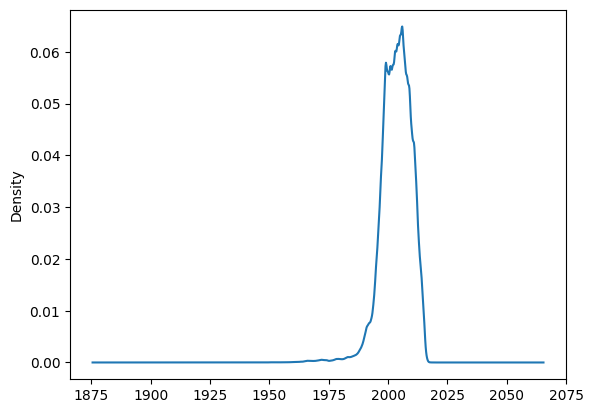

In [50]:
df['yearOfRegistration'].plot.kde()

**Conclusion:**
    
* yearofRegistration is **`Left Skewed Distribution`** because more data points on the right side 

**3) Create a plot based on the Variation of the price range by the vehicle type**

<Axes: xlabel='vehicleType'>

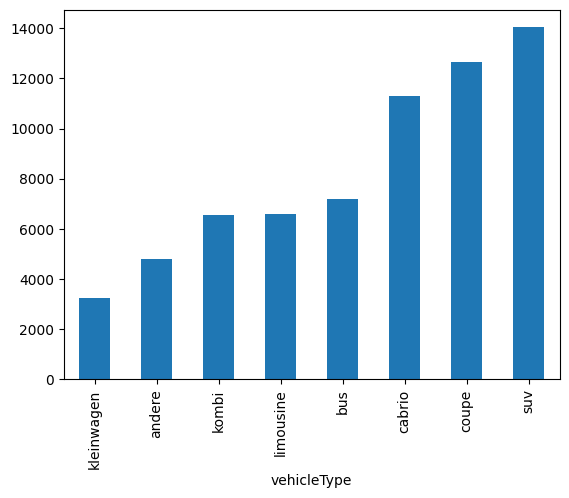

In [51]:
df.groupby("vehicleType")["price"].agg('mean').sort_values().plot(kind="bar")

The price range varies based on the vehicle type, with SUVs having the highest price range, coupes coming in at the second highest, and Kleinwagens having the lowest price range.

**4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client**

<Axes: xlabel='vehicleType', ylabel='Count of Vehicles'>

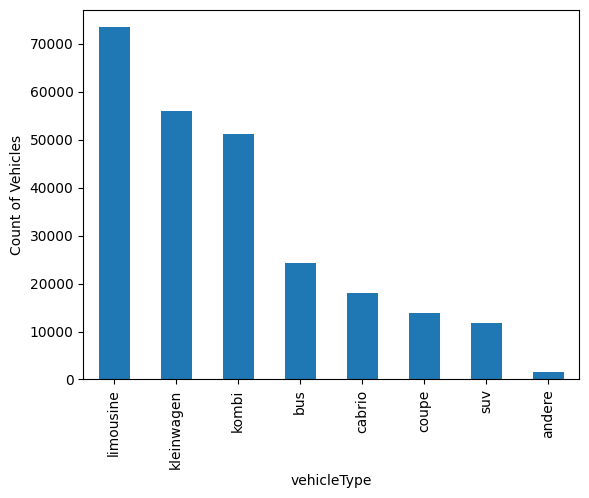

In [52]:
df["vehicleType"].value_counts().plot(kind="bar",ylabel = "Count of Vehicles")

the Limousine vehicle type has the highest count on eBay for sale, followed by Kleinwagen, and the lowest count is for "Andere" (Other) vehicle types.

**5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)**

In [54]:
df.corr(numeric_only=True)


,price,yearOfRegistration,powerPS,kilometer
price,1.000000,0.388518,0.254539,-0.422993
yearOfRegistration,0.388518,1.000000,0.103410,-0.408042
powerPS,0.254539,0.103410,1.000000,-0.015476
kilometer,-0.422993,-0.408042,-0.015476,1.000000


<Axes: xlabel='price', ylabel='kilometer'>

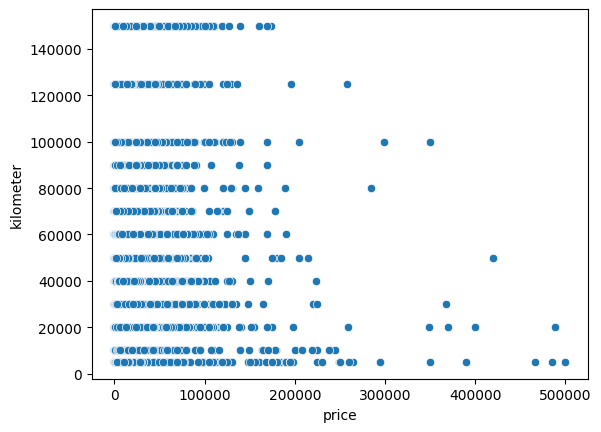

In [55]:
sns.scatterplot(data=df,x=df['price'],y=df["kilometer"])

<Axes: >

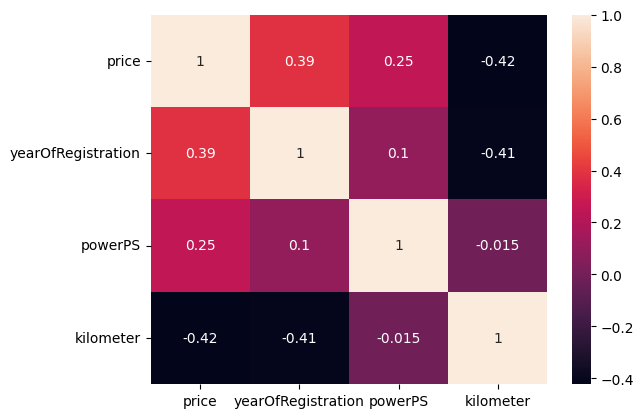

In [57]:
sns.heatmap(df.corr(numeric_only=True),annot= True)

**Conclusion**
* The relationship between price and kilometer is -0.4 i,e Negative Weak Relationship